# 데이터 명세

## 데이터 파일의 구조

---

파일 구조를 더 깊게 표기하지 않은 폴더는 하위 파일 또는 폴더가 너무 많기 때문에 생략한다.

data/  
└── 한국어 음성/  
　　　├── 전시문_통합_스크립트/ - 음성 데이터의 파일명과 해당 데이터의 전사문이 나열된 trn 파일을 담는 폴더  
　　　│　　├── dev.trn  
　　　│　　├── eval_clean.trn  - 평가용 스크립트  
　　　│　　├── eval_other.trn  
　　　│　　└── train.trn - 학습용 스크립트  
　　　├── 평가용_데이터/ - 오롯이 pcm 파일로만 이뤄진 평가용 데이터셋 폴더  
　　　│　　├── eval_clean/  
　　　│　　└── eval_other/  
　　　└── 한국어_음성_분야/ - 학습에 사용할 음성 데이터와 전사문들이 담긴 폴더  
　　　　　　├── KsponSpeech_01/ - 각 폴더에는 1000개의 데이터를 담고 있는 약 125개의 폴더가 들어있다.  
　　　　　　├── KsponSpeech_02/  
　　　　　　├── // KsponSpeech_03/ - 한 데이터셋의 용량이 15GB를 넘어 일부만 사용하기로 하였다.  
　　　　　　├── // KsponSpeech_04/  
　　　　　　└── // KsponSpeech_05/  


## .pcm?

---

PCM(Pulse Code Modulation)은 아날로그 음파를 디지털로 변환하는 방식 중 하나로,  
'.pcm' 확장자를 사용하는 오디오 파일은 압축되지 않은 원시 디지털 오디오 파일임을 나타낸다.  
이 방식을 사용하는 대표적인 확장자가 '.wav', '.mp3'이다.

pcm은 기본적으로 보통 Windows 미디어 플레이어를 사용해 재생할 수 없기에 직접 들어 볼 수 있도록  
해당 데이터를 사용하기 전, wav 파일로 변환하는 전처리 과정을 거치고자 한다.


## 전사문

---

음성 데이터 녹음이 끝난 후 'DB 구축을 위한 전사 가이드라인'에 따라 대화음성 전사를 진행하였다고 한다.  
아래는 전사문 파일의 예이다.

> o/ 어, 막/ 근데 사람이 너무 많아* 나도 나 한/ b/ (12시)/(열 두 시) 반부터 점심시간이니까, b/ 사람이 너무 많아갖고* 저번에는 위에 갔었어.  
b/ 그/ 현백 위층 (8층)/(팔 층)에 식+ 그/ 식당가 있잖아. b/ 어, 무슨 그냥 짜장면 먹었어. 위에서, 먹을 게 없어가지곰 b/ 그거 먹고, 막/ b/

대표적인 ETRI 전사규칙은 다음과 같다.  
1. 표준발성에서 벗어나거나 같은 전사에 대하여 두 가지 이상 발음이 가능한 경우 발음전사와 철자전사를 병행하며,  
    이 경우 (철자전사)/(발음전사)로 표기한다 (이 문서에서 향후 이를 '이중전사'라칭한다).  
    예) (컴퓨터)/(컴퓨타)
    
    
2. 발음전사: 발성된 내용을 소리 값에 최대한 가깝게 표기한다. 이는 음성인식의 음향모델링을 주된 목적으로 한다.


3. 철자전사: 표준어법에 맞게 표기한다. 이는 음성인식의 언어모델링 등을 주된 목적으로 한다.


4. 숫자, 외래어, 기호, 도량형 및 온도 단위는 발음 전사를 수행하되, 별도의 목록표를 생성하여 발음 전사별로 해당되는 표준 표기를 명시한다.


5. 이중전사를 하거나 연속 숫자 등을 전사할 때, 이중전사 또는 연속 숫자 등의 범위를 표시하기 위해 괄호(‘(‘, ‘)’, ‘[‘, ‘]’)를 사용한다.

- 잡음  
    전사문에 사용된 잡음 표시는 학습에 큰 영향을 주지 않기 때문에 모두 제거해 줄 것이다.
    - b/ : 숨소리
    - l/ : 웃음 소리
    - o/ : 다른 사람의 말 소리가 포함된 경우 맨 앞에 표기
    - n/ : 주변의 잡음


- 간투어 표현  
    발성자가 다음 발성을 준비하기 위해 발성하는 의미없는 단어이다. '아. 그. 어. 음. 저.' 등이 있다.
    간투어 뒤에 '/'를 붙여 표기한다. 이는 음성 인식에 영향을 주기에 '/'만 제거할 것이다.
    
    
- 알아듣기 힘든 발음  
    - 잘 알아 듣기 힘들 때 뒷부분에 '*'를 붙여 이중전사한다. 명확히 발성된 경우는 붙이지 않는다.  
      알아듣기 힘든 발음은 'u/'로 표기한다. 이또한 제거를 해줄 것이다.
    
    - 불필요하게 중복 또는 잘못 발성된 부분은 뒤에 '+'를 붙인다.


- 이중전사
    (A)/(B)와 같이 표기한다. A는 올바르게 작성한 '철자전사'이고, B는 발음 그대로 작성한 '발음전사'이다.  
    이런 특수 표기는 학습에 방해가 될 수 있기에 둘 중 하나를 제거해야 한다.  
    이는 각각 따로 진행해볼 것이다.

# 데이터 시각화

## pcm2wav

---

음성 데이터가 실제로 어떻게 녹음되었는지 확인해 보기 위해 pcm 파일을 wav 확장자로 변환해보기로 한다.

soundfile 모듈을 사용해서 읽어들인 pcm 데이터를 check_pcm 폴더에 저장했다.

In [1]:
import soundfile as sf
import numpy as np
import librosa
import os

In [8]:
def read_pcm(file, _filter=None):    
    with open(file, 'rb') as pcm_file:
        buf = pcm_file.read()
        pcm_data = np.frombuffer(buf, dtype='int16')
        wav_data = librosa.util.buf_to_float(pcm_data, 2)
        if _filter is not None:
            wav_data = _filter(wav_data)
        
    return wav_data

In [10]:
sample_dir = 'data/한국어 음성/한국어_음성_분야/KsponSpeech_01/KsponSpeech_0001/'
data_dir = 'check_pcm/'
for file in os.listdir(sample_dir):
    fileName, fileExtension = os.path.splitext(file)
    if fileExtension == '.pcm':
        wav_data = read_pcm(sample_dir+file)
        sf.write(os.path.join(data_dir, fileName+'.wav'), wav_data, 16000, format='WAV', endian="LITTLE", subtype="PCM_16")

## Waveform 시각화

---

numpy 모듈의 frombuffer 함수와 librosa의 buf_to_float 함수를 통해 pcm 파일을 쉽게 디코딩할 수 있다.  
이렇게 나온 float 배열을 matplotlib으로 시각화 해보았다

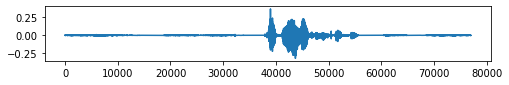

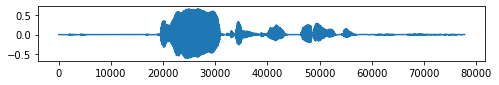

In [198]:
def view_waveform(file):
    import matplotlib.pyplot as plt

    wav_data = read_pcm(file)
        
    plt.figure(figsize=(8,1))
    plt.plot(wav_data)
    plt.show()
        
view_waveform('data/한국어 음성/한국어_음성_분야/KsponSpeech_01/KsponSpeech_0001/KsponSpeech_000027.pcm')
view_waveform('data/한국어 음성/한국어_음성_분야/KsponSpeech_01/KsponSpeech_0001/KsponSpeech_000031.pcm')

해당 두 데이터는 전사문에 잡음(o/)이 포함된 데이터의 waveform이다. 주요 waveform 앞뒤로 불필요한 노이즈가 붙어있음을 확인할 수 있다.  
wav 파일의 실제 오디오를 들어보았을 때 잡음이 생각보다 음량이 작았던 걸로 보아 노이즈 필터링을 거쳐야 함을 인지했다.

# 데이터 전처리

## 음성 데이터

### 잡음 제거

---

전사문에 o/가 포함된 음성 데이터의 float 배열을 불러와 임계값 아래의 수치들을 0.1배 시켜보았다.  
실제 노이즈 제거 방법과는 많이 다르지만 간단하게 제거가 되었다.  
노이즈를 아예 없애진 못하였고 지직 거리는 소리로 바뀌었지만 발음이 들리는 것을 없앴다는 것에 초점을 두었다.

In [222]:
def noise_filter(data):
    data[abs(data) < 3.0e-03] *= 0.1
    return data

In [226]:
sample_dir = 'data/한국어 음성/한국어_음성_분야/KsponSpeech_01/KsponSpeech_0001/'
data_dir = 'noise_filtered/'
filtered = 0

for file in os.listdir(sample_dir):
    fileName, fileExtension = os.path.splitext(file)
    if fileExtension == '.pcm':
        with open(sample_dir+fileName+'.txt', 'r') as text_file:
            transcribe = text_file.read()
        if transcribe.startswith('o/'):
            filterFunction = noise_filter
            filtered += 1
        else:
            filterFunction = None
                
        wav_data = read_pcm(sample_dir+file, _filter=filterFunction)
        sf.write(os.path.join(data_dir, fileName+'.wav'), wav_data, 16000, format='WAV', endian="LITTLE", subtype="PCM_16")
        
print('filtered data:', filtered)

filtered data: 239


잡음 제거 전


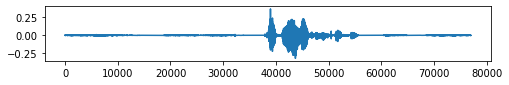

잡음 제거 후


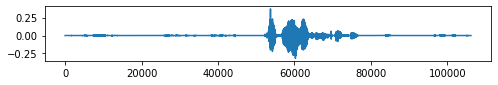

In [255]:
print('잡음 제거 전')
view_waveform('data/한국어 음성/한국어_음성_분야/KsponSpeech_01/KsponSpeech_0001/KsponSpeech_000027.pcm')

print('잡음 제거 후')
plt.figure(figsize=(8,1))
sig, sr = librosa.load('noise_filtered/KsponSpeech_000027.wav')
plt.plot(sig)
plt.show()

# 음성 인식

구글의 오픈 API SpeechRecognition으로 데이터 음성 인식을 실행해보고자 한다.

In [227]:
!pip install SpeechRecognition

In [1]:
import soundfile as sf
import numpy as np
import librosa
import os

In [2]:
import speech_recognition as sr

r = sr.Recognizer()

In [3]:
korean_wav = sr.AudioFile('check_pcm/KsponSpeech_000031.wav')

with korean_wav as source:
    audio = r.record(source)

r.recognize_google(audio_data=audio, language='ko-KR')

'아 그건 절대로 안 할 거야'

## 음성 분리하기
출력되는 인식 결과를 바탕으로 음성 데이터를 글자별로 쪼개 글자끼리 비교해보자.

In [4]:
def split_wav(wav_data, sentence):
    window = 0
    while True:
        window += 500
        sf.write(os.path.join('temp/split_1.wav'), wav_data[:window], 16000, format='WAV', endian="LITTLE", subtype="PCM_16")
        sf.write(os.path.join('temp/split_2.wav'), wav_data[window:], 16000, format='WAV', endian="LITTLE", subtype="PCM_16")
        
        wav = sr.AudioFile('temp/split_1.wav')
        with wav as src1:
            audio = r.record(src1)
            try:
                r1 = r.recognize_google(audio_data=audio, language='ko-KR')
            except:
                continue

        wav = sr.AudioFile('temp/split_2.wav')
        with wav as src2:
            audio = r.record(src2)
            try:
                r2 = r.recognize_google(audio_data=audio, language='ko-KR')
            except:
                break 
        
        if (sentence.endswith(r1 + ' ' + r2)):
            wav_data = wav_data[window:]
            window = 0
        
wav_data = librosa.util.buf_to_float(audio.get_wav_data(), 2)
output = r.recognize_google(audio_data=audio, language='ko-KR')    
word = split_wav(wav_data, output)

아/그건 절대로 안 할 거야
-->
아 그거/절대로 안 할 거야
아 그거/절대로 안 할 거야
아 그거/절대로 안 할 거야
아 그건/절대로 안 할 거야
-->
벌떼/할까
벌떼/할 거야
절대/할 거야
